<a href="https://colab.research.google.com/github/SINGHAMIT1/CNN-using-CIFAR10-MNIST-datasets/blob/main/cnn_mnist_Amit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In this notebook I will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

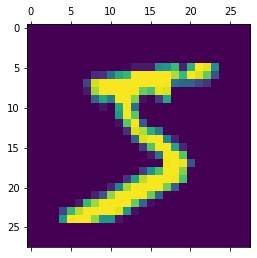

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

<h3 style='color:purple'>Using ANN for classification</h3>

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2699 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1248 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0876 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0652 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9839


In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9767


[0.07918880879878998, 0.9767000079154968]

In [26]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [27]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [30]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 4ms/step - loss: 0.1586 - accuracy: 0.9512
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0547 - accuracy: 0.9836
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0350 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0240 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0165 - accuracy: 0.9948


In [32]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [33]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0459 - accuracy: 0.9861


[0.04586758464574814, 0.9861000180244446]